In [3]:
#Jose Leos
#CSCI 185 - Web and Data Mining

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [5]:
#Reading in Data
try: os.chdir('../data/GroupMining')    
except:
    pass

#These files have footers
df_Expend = pd.read_csv('../data/Expenditure_Data.txt', skipfooter = 5, engine = 'python')
df_Salary = pd.read_csv('../data/Salary_Data.txt', skipfooter = 5, engine = 'python')
df_CA = pd.read_csv('../data/Chronic_Absent.txt', sep = '|')

#Does not contain footers
df_Test_Scores = pd.read_csv('../data/Test_Score_Results.txt', sep = '\t')


#Updating Columns to be the same format
df_Salary.columns = df_Salary.columns.str.upper()
df_Expend.columns = df_Expend.columns.str.upper()
df_Test_Scores.columns = df_Test_Scores.columns.str.upper()
df_CA.columns = df_CA.columns.str.upper()

In [ ]:
#Pre-Processing

#Data Reduction
#3 Values STEXP, DSAL, STSAL
df_Expend.drop(['SARCYEAR','C', 'D', 'S', 'STEXP'], axis = 1,inplace=True)

#3 Values BTCHSAL, MTCHSAL, HTCHSAL
df_Salary = df_Salary[['CDSCODE', 'BTCHSAL', 'MTCHSAL','HTCHSAL']]

#4 Values SELA_Y2, SMATH_Y2, DELA_Y2, DMATH_Y2
df_Test_Scores = df_Test_Scores[['CDSCODE','SELA_Y2', 'SMATH_Y2','DELA_Y2','DMATH_Y2']]

#1 Value PERSD
df_SED = pd.read_csv('../data/Subgroup_Data.txt', usecols = ['CDSCODE', 'PERSD'])

# Values RALL, REL,RSED
df_CA = df_CA[['CDSCODE', 'RALL', 'REL', 'RSED', ]]

#Since we are looking for correlations for test scores we use NaN for missing test score
#values. When we merge, we will remove any row that has NaN values
df_Test_Scores.replace(['--','0'], np.nan, inplace=True)

# Convert all test score columns to numeric
for col in ['SELA_Y2', 'SMATH_Y2', 'DELA_Y2', 'DMATH_Y2']:
    df_Test_Scores[col] = pd.to_numeric(df_Test_Scores[col], errors='coerce')

#Filling in NaN values since there is a possibility there are test scores but 0 SED #students
df_SED.replace([np.nan], 0, inplace=True)

#Filling NaN values with Means
df_Expend.fillna(df_Expend.mean(numeric_only = True),inplace=True)
df_Salary.fillna(df_Salary.mean(numeric_only = True),inplace=True)

# Convert all salary columns to numeric
for col in ['BTCHSAL', 'MTCHSAL', 'HTCHSAL']:
    df_Salary[col] = pd.to_numeric(df_Salary[col], errors='coerce')

# Convert all chronic absence columns to numeric
for col in ['RALL', 'REL', 'RSED']:
    df_CA[col] = pd.to_numeric(df_CA[col], errors='coerce')

# Convert PERSD to numeric
df_SED['PERSD'] = pd.to_numeric(df_SED['PERSD'], errors='coerce')

# Convert expenditure columns to numeric
for col in ['DSAL', 'STSAL']:
    df_Expend[col] = pd.to_numeric(df_Expend[col], errors='coerce')

#List of all Data Frames
#Keep adding data frames to here after reduction
data_frames = [df_Expend, df_Salary, df_Test_Scores, df_SED, df_CA]

#Merging all DataFrames
df_merge = df_Expend.merge(df_Salary).merge(df_Test_Scores).merge(df_SED).merge(df_CA)

#Removing NaN values
df_merge.dropna(inplace=True)

#Normalizing attributes with values in the thousands
scaler = MinMaxScaler()

#Insert Attributes to Normalize
columns_to_normalize = ['DSAL', 'STSAL', 'BTCHSAL', 'MTCHSAL', 'HTCHSAL']

#Normalize
df_merge[columns_to_normalize] = scaler.fit_transform(df_merge[columns_to_normalize])

# Check data types to ensure they're all numeric
print("Data types in merged dataframe:")
print(df_merge.dtypes)

,CDSCODE,DSAL,STSAL,BTCHSAL,MTCHSAL,HTCHSAL,SELA_Y2,SMATH_Y2,DELA_Y2,DMATH_Y2,PERSD,RALL,REL,RSED
CDSCODE,1.000000,0.060347,-0.011851,0.074795,0.072118,0.104121,-0.006569,-0.002964,-0.001371,0.006472,-0.092118,-0.085225,-0.065527,-0.071833
DSAL,0.060347,1.000000,0.441055,0.701304,0.851891,0.883870,0.227519,0.227829,0.346227,0.315944,-0.133706,-0.122949,-0.062061,-0.101155
STSAL,-0.011851,0.441055,1.000000,0.227977,0.375399,0.402506,0.052524,0.013928,0.109177,0.031111,0.066847,0.014206,0.052986,0.004814
BTCHSAL,0.074795,0.701304,0.227977,1.000000,0.746493,0.715848,0.128169,0.134222,0.200029,0.187547,-0.111207,-0.079468,-0.036705,-0.057102
MTCHSAL,0.072118,0.851891,0.375399,0.746493,1.000000,0.829067,0.179878,0.183472,0.273260,0.254281,-0.113218,-0.116085,-0.059290,-0.097690
HTCHSAL,0.104121,0.883870,0.402506,0.715848,0.829067,1.000000,0.179836,0.177785,0.283604,0.254177,-0.132121,-0.117623,-0.073263,-0.097714
SELA_Y2,-0.006569,0.227519,0.052524,0.128169,0.179878,0.179836,1.000000,0.863551,0.677975,0.645313,-0.756458,-0.617947,-0.386212,-0.475712
SMATH_Y2,-0.002964,0.227829,0.013928,0.134222,0.183472,0.177785,0.863551,1.000000,0.668850,0.711119,-0.764334,-0.590279,-0.412761,-0.435061
DELA_Y2,-0.001371,0.346227,0.109177,0.200029,0.273260,0.283604,0.677975,0.668850,1.000000,0.948619,-0.649101,-0.392325,-0.230644,-0.262101
DMATH_Y2,0.006472,0.315944,0.031111,0.187547,0.254281,0.254177,0.645313,0.711119,0.948619,1.000000,-0.660432,-0.393967,-0.245703,-0.256047


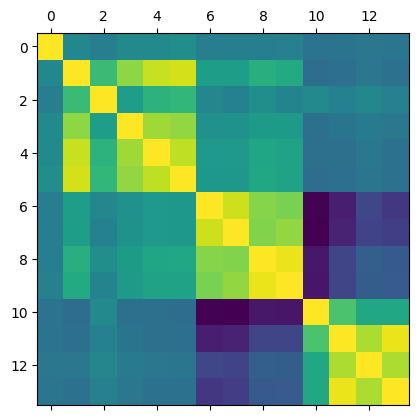

In [ ]:
# Display correlation matrix
display(df_merge.corr())

# Create enhanced correlation matrix visualization
fig, ax = plt.subplots(figsize=(12, 10))
corr = df_merge.corr()

# Use ax.matshow for better control
heatmap = ax.matshow(corr, cmap=plt.cm.coolwarm)
ax.set_title("Correlation Matrix of School Data Variables", fontsize=16, pad=20)
plt.colorbar(heatmap, ax=ax)

# Improve readability of labels
labels = corr.columns
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90, fontsize=8)
ax.set_yticklabels(labels, fontsize=8)

# Add correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(i, j, f"{corr.iloc[i, j]:.2f}", 
               ha="center", va="center", 
               color="white" if abs(corr.iloc[i, j]) > 0.5 else "black",
               fontsize=7)

plt.tight_layout()
plt.show()

# Analyzing Key Relationships in the Data

Now that we've processed our data and looked at the correlation matrix, let's examine some of the most important relationships more closely.

In [ ]:
# Relationship between teacher salaries and test scores
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['HTCHSAL'], df_merge['SMATH_Y2'], alpha=0.5, c='blue')

# Add a trend line
z = np.polyfit(df_merge['HTCHSAL'], df_merge['SMATH_Y2'], 1)
p = np.poly1d(z)
plt.plot(np.linspace(0, 1, 100), p(np.linspace(0, 1, 100)), 
         "r-", linewidth=2, label=f'Trend (r={df_merge["HTCHSAL"].corr(df_merge["SMATH_Y2"]):.2f})')

plt.title('High Teacher Salary vs. State Math Scores', fontsize=14)
plt.xlabel('High Teacher Salary (Normalized)', fontsize=12)
plt.ylabel('State Math Scores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Relationship between chronic absence and test scores
plt.figure(figsize=(10, 6))
plt.scatter(df_merge['RALL'], df_merge['SMATH_Y2'], alpha=0.5, c='red')

# Add a trend line
z = np.polyfit(df_merge['RALL'], df_merge['SMATH_Y2'], 1)
p = np.poly1d(z)
plt.plot(np.linspace(min(df_merge['RALL']), max(df_merge['RALL']), 100), 
         p(np.linspace(min(df_merge['RALL']), max(df_merge['RALL']), 100)), 
         "r-", linewidth=2, label=f'Trend (r={df_merge["RALL"].corr(df_merge["SMATH_Y2"]):.2f})')

plt.title('Chronic Absence Rate vs. State Math Scores', fontsize=14)
plt.xlabel('Chronic Absence Rate (All Students)', fontsize=12)
plt.ylabel('State Math Scores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Relationship between socioeconomic disadvantage and test scores
plt.figure(figsize=(10, 6))

# Convert PERSD to percentage for better readability
plt.scatter(df_merge['PERSD'] * 100, df_merge['SMATH_Y2'], alpha=0.5, c='green')

# Add a trend line
z = np.polyfit(df_merge['PERSD'] * 100, df_merge['SMATH_Y2'], 1)
p = np.poly1d(z)
plt.plot(np.linspace(0, 100, 100), 
         p(np.linspace(0, 100, 100)), 
         "r-", linewidth=2, label=f'Trend (r={df_merge["PERSD"].corr(df_merge["SMATH_Y2"]):.2f})')

plt.title('Socioeconomically Disadvantaged % vs. State Math Scores', fontsize=14)
plt.xlabel('Percentage of Socioeconomically Disadvantaged Students', fontsize=12)
plt.ylabel('State Math Scores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Key Findings

From the correlation analysis and visualizations above, we can observe several important patterns:

1. There is a strong negative correlation between the percentage of socioeconomically disadvantaged students and test scores.

2. Teacher salaries show a modest positive correlation with student test scores.

3. Higher chronic absence rates are associated with lower test scores.

4. Different measures of teacher salary (beginning, mid-career, high) are strongly correlated with each other, suggesting districts with higher starting salaries tend to maintain competitive pay throughout career progression.

In [ ]:
# Create bar chart showing test scores by SED category
# Create SED categories for grouping
df_merge['SED_Category'] = pd.cut(df_merge['PERSD'], 
                                  bins=[0, 0.25, 0.5, 0.75, 1.0], 
                                  labels=['0-25%', '25-50%', '50-75%', '75-100%'])

# Group by SED category and calculate mean test scores
sed_groups = df_merge.groupby('SED_Category')[['SELA_Y2', 'SMATH_Y2', 'DELA_Y2', 'DMATH_Y2']].mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 8))
sed_groups[['SELA_Y2', 'SMATH_Y2']].plot(kind='bar', ax=ax, rot=0)
ax.set_title('State Test Scores by Socioeconomically Disadvantaged Student Percentage', fontsize=14)
ax.set_xlabel('Percentage of Socioeconomically Disadvantaged Students', fontsize=12)
ax.set_ylabel('Average Test Score', fontsize=12)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(['ELA Scores', 'Math Scores'])

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=9)

plt.tight_layout()
plt.show()

# Annotated Correlation Matrix

Let's create an improved correlation matrix with annotations highlighting the key relationships in our data.

In [ ]:
# Create an annotated correlation matrix
import seaborn as sns

# Create figure
plt.figure(figsize=(14, 12))

# Create correlation matrix
corr = df_merge.corr()

# Generate mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap with annotations
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
                mask=mask, vmin=-1, vmax=1, annot_kws={"size": 8})

# Add title and explanation
plt.title("Correlation Matrix with Key Insights", fontsize=16, pad=20)

# Get the positions in the matrix for the correlations we want to highlight
# Find exact row and column indices for specific variables
columns = list(corr.columns)
persd_idx = columns.index('PERSD')
smath_idx = columns.index('SMATH_Y2')
rall_idx = columns.index('RALL')
htchsal_idx = columns.index('HTCHSAL')

# Now we need to get the specific correlations we want to highlight
# For PERSD and SMATH_Y2 (socioeconomic disadvantage and test scores)
# We want to target the exact cell
sed_test_value = corr.iloc[smath_idx, persd_idx]  # Get actual correlation value
sed_test_x = persd_idx
sed_test_y = smath_idx

# For HTCHSAL and SMATH_Y2 (teacher salaries and test scores)
salary_test_value = corr.iloc[smath_idx, htchsal_idx]
salary_test_x = htchsal_idx
salary_test_y = smath_idx

# For RALL and SMATH_Y2 (absence rates and test scores)
absence_test_value = corr.iloc[smath_idx, rall_idx]
absence_test_x = rall_idx
absence_test_y = smath_idx

# Highlight key correlations with precisely positioned annotations
# Test Scores and SED relationship (strong negative correlation)
plt.annotate(f"Strong negative correlation between\nsocioeconomic disadvantage and test scores\n(r = {sed_test_value:.2f})",
            xy=(sed_test_x, sed_test_y),  # Target exact cell
            xytext=(sed_test_x + 2, sed_test_y - 2),  # Position text box
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8, 
                            connectionstyle="arc3,rad=-0.2"),
            horizontalalignment='center', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Teacher salary and test scores (modest positive correlation)
plt.annotate(f"Modest positive correlation between\nteacher salaries and test scores\n(r = {salary_test_value:.2f})",
            xy=(salary_test_x, salary_test_y),  # Target exact cell
            xytext=(salary_test_x - 2.5, salary_test_y - 3),  # Position text box
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8,
                            connectionstyle="arc3,rad=0.2"),
            horizontalalignment='center', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Chronic absence and test scores (negative correlation)
plt.annotate(f"Negative correlation between\nabsence rates and test scores\n(r = {absence_test_value:.2f})",
            xy=(absence_test_x, absence_test_y),  # Target exact cell
            xytext=(absence_test_x + 1, absence_test_y + 3),  # Position text box
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8,
                            connectionstyle="arc3,rad=0.1"),
            horizontalalignment='center', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.tight_layout()
plt.show()